In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
%matplotlib inline
sns.set()

In [2]:
# loading the csv file
fuel_consumption = pd.read_csv("MY2010-2014 Fuel Consumption Ratings 5-cycle.csv", encoding="latin1")

C:\Users\user\AppData\Local\Temp\ipykernel_19548\393584059.py:2: DtypeWarning: Columns (4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_consumption = pd.read_csv("MY2010-2014 Fuel Consumption Ratings 5-cycle.csv", encoding="latin1")


### DATA CLEANING

In [3]:
# preview to see what the loaded file looks like
fuel_consumption.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dropping the columns that contains all NAN
fuel_consumption = fuel_consumption.dropna(axis = 1, how = "all")

In [5]:
fuel_consumption.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304


In [6]:
# droping the first row which contains the columns unit
fuel_consumption = fuel_consumption.drop(0, axis = 0)

In [7]:
# renaming the columns
fuel_consumption.columns = ["MODEL YEAR", "MAKE", "MODEL", "VEHICLE CLASS", "ENGINE SIZE", "CYLINDERS", "TRANSMISSION",
                        "FUEL TYPE", "FUEL CONSUMPTION CITY(L/100KM)", "FUEL CONSUMPTION HWY(L/100KM)", 
                         "FUEL CONSUMPTION COMB(L/100KM)", "FUEL CONSUMPTION COMB(MPG)", "C02 EMISSIONS"]

In [8]:
# checking the number of null values
fuel_consumption.isnull().sum()

MODEL YEAR                        16
MAKE                               6
MODEL                             25
VEHICLE CLASS                     25
ENGINE SIZE                       25
CYLINDERS                         25
TRANSMISSION                      25
FUEL TYPE                         25
FUEL CONSUMPTION CITY(L/100KM)    25
FUEL CONSUMPTION HWY(L/100KM)     25
FUEL CONSUMPTION COMB(L/100KM)    25
FUEL CONSUMPTION COMB(MPG)        25
C02 EMISSIONS                     25
dtype: int64

In [9]:
# the NAN are entries in the CSV file that are not part of the dataset
# i will be dropping all the null values
fuel_consumption.dropna(axis=0, inplace = True)

In [10]:
# from this majority of the columns are not in the right data type, so there are needs for them to be changed
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MODEL YEAR                      5359 non-null   object 
 1   MAKE                            5359 non-null   object 
 2   MODEL                           5359 non-null   object 
 3   VEHICLE CLASS                   5359 non-null   object 
 4   ENGINE SIZE                     5359 non-null   object 
 5   CYLINDERS                       5359 non-null   float64
 6   TRANSMISSION                    5359 non-null   object 
 7   FUEL TYPE                       5359 non-null   object 
 8   FUEL CONSUMPTION CITY(L/100KM)  5359 non-null   object 
 9   FUEL CONSUMPTION HWY(L/100KM)   5359 non-null   object 
 10  FUEL CONSUMPTION COMB(L/100KM)  5359 non-null   object 
 11  FUEL CONSUMPTION COMB(MPG)      5359 non-null   object 
 12  C02 EMISSIONS                   53

In [11]:
# changing the numerical variables to their correct data type
fuel_consumption[["MODEL YEAR", "ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION CITY(L/100KM)", "FUEL CONSUMPTION HWY(L/100KM)",
                 "FUEL CONSUMPTION COMB(L/100KM)", "FUEL CONSUMPTION COMB(MPG)", "C02 EMISSIONS"]] = fuel_consumption[["MODEL YEAR", "ENGINE SIZE",
                 "CYLINDERS", "FUEL CONSUMPTION CITY(L/100KM)", "FUEL CONSUMPTION HWY(L/100KM)","FUEL CONSUMPTION COMB(L/100KM)", 
                 "FUEL CONSUMPTION COMB(MPG)", "C02 EMISSIONS"]].apply(pd.to_numeric)

In [12]:
# checking for duplicated rows
fuel_consumption.duplicated().sum()

0

In [13]:
# reseting the index
cleaned_fuel_consumption = fuel_consumption.reset_index()
cleaned_fuel_consumption.drop(cleaned_fuel_consumption[['index']], axis = 1, inplace = True)

In [14]:
cleaned_fuel_consumption.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY(L/100KM),FUEL CONSUMPTION HWY(L/100KM),FUEL CONSUMPTION COMB(L/100KM),FUEL CONSUMPTION COMB(MPG),C02 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30.0,219.0
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32.0,205.0
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28.0,230.0
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21.0,304.0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24.0,274.0


In [15]:
cleaned_fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MODEL YEAR                      5359 non-null   int64  
 1   MAKE                            5359 non-null   object 
 2   MODEL                           5359 non-null   object 
 3   VEHICLE CLASS                   5359 non-null   object 
 4   ENGINE SIZE                     5359 non-null   float64
 5   CYLINDERS                       5359 non-null   float64
 6   TRANSMISSION                    5359 non-null   object 
 7   FUEL TYPE                       5359 non-null   object 
 8   FUEL CONSUMPTION CITY(L/100KM)  5359 non-null   float64
 9   FUEL CONSUMPTION HWY(L/100KM)   5359 non-null   float64
 10  FUEL CONSUMPTION COMB(L/100KM)  5359 non-null   float64
 11  FUEL CONSUMPTION COMB(MPG)      5359 non-null   float64
 12  C02 EMISSIONS                   53

#### Building the model (Linear Regression)

In [16]:
# creating a variable to store the numerical features
numerical_variables = cleaned_fuel_consumption.select_dtypes(exclude = "object")
numerical_variables

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY(L/100KM),FUEL CONSUMPTION HWY(L/100KM),FUEL CONSUMPTION COMB(L/100KM),FUEL CONSUMPTION COMB(MPG),C02 EMISSIONS
0,2010,2.0,4.0,10.9,7.8,9.5,30.0,219.0
1,2010,2.0,4.0,10.0,7.6,8.9,32.0,205.0
2,2010,2.0,4.0,11.6,8.1,10.0,28.0,230.0
3,2010,3.7,6.0,14.8,11.3,13.2,21.0,304.0
4,2010,2.3,4.0,13.2,10.3,11.9,24.0,274.0
...,...,...,...,...,...,...,...,...
5354,2014,3.0,6.0,13.4,9.8,11.8,24.0,271.0
5355,2014,3.2,6.0,13.2,9.5,11.5,25.0,264.0
5356,2014,3.0,6.0,13.4,9.8,11.8,24.0,271.0
5357,2014,3.2,6.0,12.9,9.3,11.3,25.0,260.0


In [17]:
# Creating the input and target variable
# using only the numerical variables as input
x = numerical_variables.drop("C02 EMISSIONS", axis = 1)
y = numerical_variables["C02 EMISSIONS"]

##### Scaling

In [18]:
# since the variables are of different scale, their is need to standardized the variables
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [19]:
x_scaled = scaler.transform(x)

##### Model Selection

In [20]:
#this is to split the data into test and traning dataset with a split ration of 80% and 20% respectively.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

##### Creating the Regression

In [21]:
reg = LR()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
def model_summary (reg, x_test, y_test):
    # Making prediction on the test data 
    y_pred = reg.predict(x_test)
    # Evaluating the model
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_SE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_summary_table = pd.DataFrame({"Mean ABS": [mean_abs], "Root MSE": [np.sqrt(mean_SE)], "R2 Score": [r2]})
    return model_summary_table

In [23]:
# printing the model summary
model_summary (reg, x_test, y_test)

,Mean ABS,Root MSE,R2 Score
0,14.979057,22.626119,0.875444


In [24]:
# creating a table for each of the features and their respective weight on the target
reg_table = pd.DataFrame(x.columns.values, columns = ["Numerical Variables"])
reg_table["weight"] = reg.coef_

In [25]:
reg_table

,Numerical Variables,weight
0,MODEL YEAR,-2.001746
1,ENGINE SIZE,7.167137
2,CYLINDERS,18.039244
3,FUEL CONSUMPTION CITY(L/100KM),52.040505
4,FUEL CONSUMPTION HWY(L/100KM),36.745399
5,FUEL CONSUMPTION COMB(L/100KM),-75.477792
6,FUEL CONSUMPTION COMB(MPG),-26.514466


Text(0, 0.5, 'AVERAGE C02 EMISSIONS')

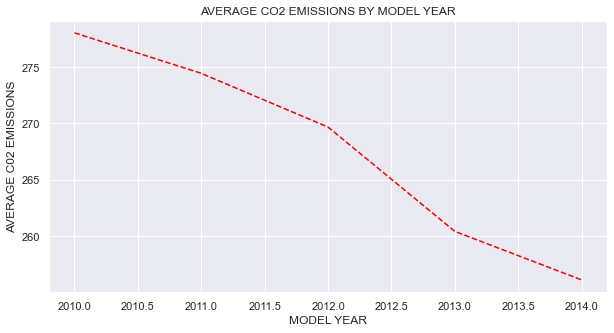

In [26]:
# visualising how CO2 emissions have changed over the years

plt.figure(figsize=(10,5))

# Group data by year and calculate average CO2 emissions
co2_avg = cleaned_fuel_consumption.groupby('MODEL YEAR')['C02 EMISSIONS'].mean()

# Create line plot of average CO2 emissions by year using seaborn
sns.lineplot(x = co2_avg.index, y = co2_avg.values, color = 'red', linestyle='--')

# Add title and labels
plt.title('AVERAGE CO2 EMISSIONS BY MODEL YEAR')
plt.xlabel('MODEL YEAR')
plt.ylabel('AVERAGE C02 EMISSIONS')

##### Exploratory Data Analysis (EDA) of the dataset

Text(0.5, 1.0, 'COUNTS OF VEHICLES BY MAKE')

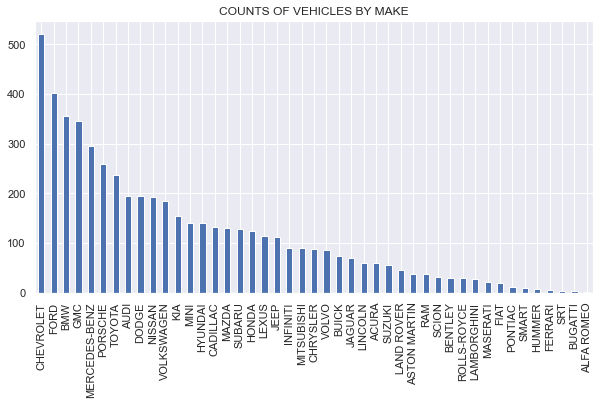

In [27]:
cleaned_fuel_consumption['MAKE'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('COUNTS OF VEHICLES BY MAKE')

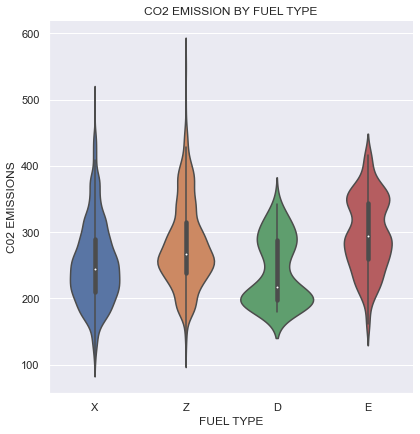

In [28]:
sns.catplot(x='FUEL TYPE', y='C02 EMISSIONS', data=cleaned_fuel_consumption, kind='violin', height=6)
plt.title('CO2 EMISSION BY FUEL TYPE')
plt.show()

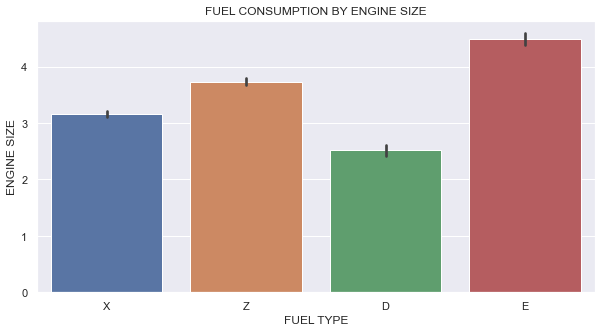

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(data = cleaned_fuel_consumption, x = 'FUEL TYPE', y = 'ENGINE SIZE')
plt.xlabel('FUEL TYPE')
plt.ylabel('ENGINE SIZE')
plt.title('FUEL CONSUMPTION BY ENGINE SIZE')
plt.show()

Text(0.5, 1.0, 'TRANSMISSION BY ENGINE SIZE AND CYLINDER')

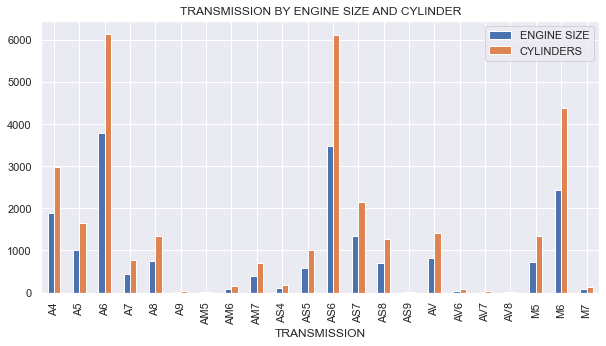

In [30]:
transmission = cleaned_fuel_consumption.loc[:, ['ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION']].groupby('TRANSMISSION').sum()
transmission.plot(kind='bar', figsize=(10, 5))
plt.title('TRANSMISSION BY ENGINE SIZE AND CYLINDER')

C:\Users\user\AppData\Local\Temp\ipykernel_19548\3973666631.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_fuel_consumption.corr(), annot=True)


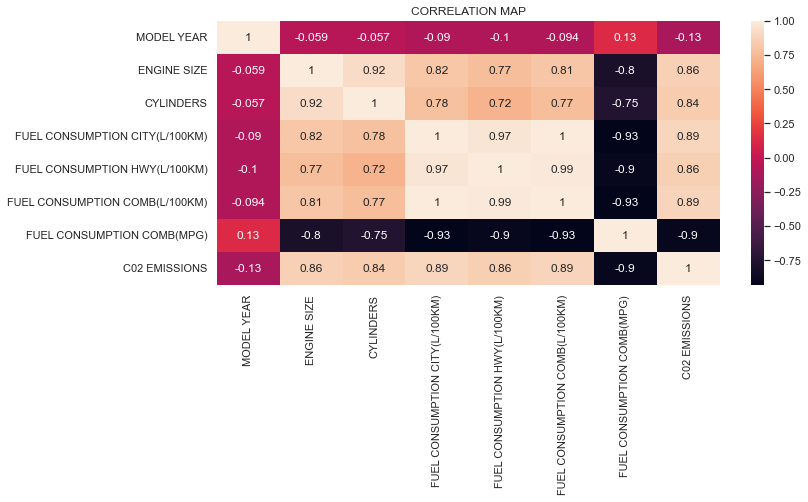

In [31]:
figure = plt.figure(figsize=(12, 7))
sns.heatmap(cleaned_fuel_consumption.corr(), annot=True)
plt.tight_layout()
plt.title('CORRELATION MAP')
plt.show()

##### Linear Regression without Model year

In [32]:
# dropping the model year from the feature to run the regession again
z = numerical_variables.drop(["C02 EMISSIONS", "MODEL YEAR"] , axis = 1)

In [33]:
scaler = StandardScaler()
scaler.fit(z)
z_scaled = scaler.transform(z)
z_train, z_test, y_train, y_test = train_test_split(z_scaled, y, test_size = 0.2, random_state = 42)
reg_z = LR()
reg_z.fit(z_train, y_train)

LinearRegression()

In [34]:
model_summary (reg_z, z_test, y_test)

,Mean ABS,Root MSE,R2 Score
0,15.028624,22.737728,0.874213


##### DecisionTree

In [35]:
# using Decision tree regressor
Dt = DecisionTreeRegressor()
Dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
model_summary (Dt, x_test, y_test)

,Mean ABS,Root MSE,R2 Score
0,1.324005,8.555711,0.98219


In [37]:
# Create a dataframe with two columns, one for the model name and one for the R^2 score, to compare the models performance
performance = pd.DataFrame(columns=["model", "R^2 score"])

# Add the R^2 scores for the linear regression, decision tree models and Linear Regression without Model year to the dataframe
performance = performance.append({"model": "Linear Regression", "R^2 score": model_summary (reg, x_test, y_test)["R2 Score"][0]}, 
                                 ignore_index=True)
performance = performance.append({"model": "Decision Tree Regressor", "R^2 score": model_summary (Dt, x_test, y_test)["R2 Score"][0]},
                                 ignore_index=True)
performance = performance.append({"model": "Linear Regression without Model year", "R^2 score": model_summary (reg_z, z_test, y_test)["R2 Score"][0]},
                                 ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19548\868298441.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append({"model": "Linear Regression", "R^2 score": model_summary (reg, x_test, y_test)["R2 Score"][0]},
C:\Users\user\AppData\Local\Temp\ipykernel_19548\868298441.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append({"model": "Decision Tree Regressor", "R^2 score": model_summary (Dt, x_test, y_test)["R2 Score"][0]},
C:\Users\user\AppData\Local\Temp\ipykernel_19548\868298441.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append({"model": "Linear Regression without Model year", "R^2 score": model_summary (reg_z, z_test, y_test)["

In [38]:
performance

,model,R^2 score
0,Linear Regression,0.875444
1,Decision Tree Regressor,0.982190
2,Linear Regression without Model year,0.874213


Text(0.5, 1.0, 'Model performance comparison')

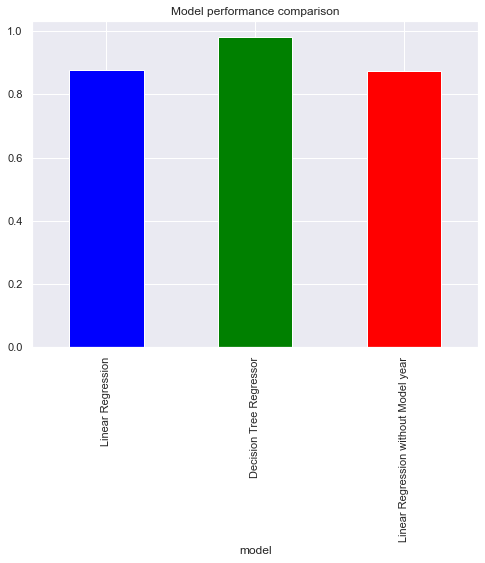

In [39]:
# creating a bar chart of the R^2 scores for the three models
performance.plot(x = "model", y = "R^2 score", kind = "bar", legend = False, color = ["blue", "green", "red"], figsize=(8,6))
plt.title("Model performance comparison")

##### Classification of features

In [40]:
#copy cleaned_fuel_consumption  
new_cleaned_fuel_consumption = cleaned_fuel_consumption

# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Select the categorical columns in the dataset
targets = ['MAKE', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE', 'MODEL']

# Apply the LabelEncoder to the categorical columns
new_cleaned_fuel_consumption[targets] = new_cleaned_fuel_consumption[targets].apply(le.fit_transform)

In [41]:
# Create an empty dataframe to store the results
evaluation = pd.DataFrame(columns={'targets':[], 'accuracy_train':[], 'f1_score_train':[], 
                                'accuracy_test':[], 'f1_score_test':[]})

In [42]:
# Iterate over the list of targets
for i in targets:

    # Select the target label and the remaining features as input and output data
    X = cleaned_fuel_consumption.drop([i], axis = 1)
    y = cleaned_fuel_consumption[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

    # Create an instance of the random forest classifier
    model = RandomForestClassifier()

    # Train the classifier on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Evaluate the performance of the classifier on the training and testing sets
    accuracy_train = accuracy_score(y_train,pred_train)
    f1_score_train = f1_score(y_train, pred_train, average = 'weighted')
    accuracy_test = accuracy_score(y_test,pred_test)
    f1_score_test = f1_score(y_test, pred_test, average = 'weighted')

    # Append the results to the evaluation dataframe
    evaluation.loc[evaluation.shape[0]] = [i, accuracy_train, f1_score_train, accuracy_test, f1_score_test]

In [43]:
evaluation

,targets,accuracy_train,f1_score_train,accuracy_test,f1_score_test
0,MAKE,1.000000,1.000000,0.949627,0.949064
1,VEHICLE CLASS,0.999533,0.999533,0.825560,0.822800
2,TRANSMISSION,0.994402,0.994397,0.843284,0.843886
3,FUEL TYPE,1.000000,1.000000,0.989739,0.989718
4,MODEL,0.908328,0.901118,0.563433,0.550566


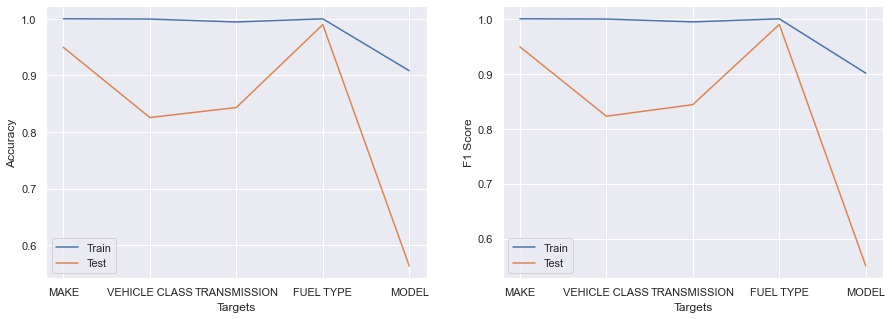

In [44]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the accuracy of the classifier on the training and testing sets
ax1.plot(evaluation['targets'], evaluation['accuracy_train'], label='Train')
ax1.plot(evaluation['targets'], evaluation['accuracy_test'], label='Test')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the F1 score of the classifier on the training and testing sets
ax2.plot(evaluation['targets'], evaluation['f1_score_train'], label='Train')
ax2.plot(evaluation['targets'], evaluation['f1_score_test'], label='Test')
ax2.set_xlabel('Targets')
ax2.set_ylabel('F1 Score')
ax2.legend()

##### Group Definition

In [45]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [46]:
# using the numerical variables
numerical_variables.head(2)

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY(L/100KM),FUEL CONSUMPTION HWY(L/100KM),FUEL CONSUMPTION COMB(L/100KM),FUEL CONSUMPTION COMB(MPG),C02 EMISSIONS
0,2010,2.0,4.0,10.9,7.8,9.5,30.0,219.0
1,2010,2.0,4.0,10.0,7.6,8.9,32.0,205.0


In [47]:
wcss=[]
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(numerical_variables)
    wcss.append(km.inertia_)

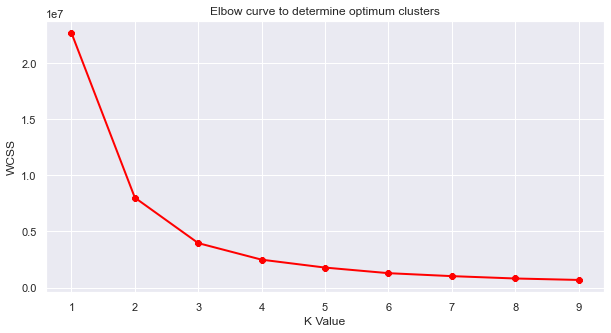

In [48]:
#The elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title('Elbow curve to determine optimum clusters')
plt.show()

In [49]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)

#Fitting the input data
km1.fit(numerical_variables)

#predicting the labels of the input data
y=km1.predict(numerical_variables)

#adding the labels to a column named label
numerical_variables["LABEL"] = y

#The new dataframe with the clustering done
numerical_variables.head(2)

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY(L/100KM),FUEL CONSUMPTION HWY(L/100KM),FUEL CONSUMPTION COMB(L/100KM),FUEL CONSUMPTION COMB(MPG),C02 EMISSIONS,LABEL
0,2010,2.0,4.0,10.9,7.8,9.5,30.0,219.0,3
1,2010,2.0,4.0,10.0,7.6,8.9,32.0,205.0,0


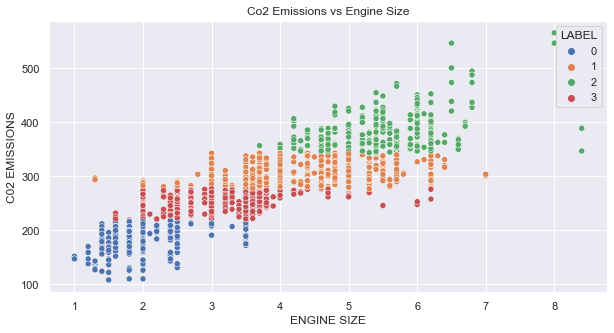

In [50]:
#Scatterplot of the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'ENGINE SIZE',y = 'C02 EMISSIONS',hue="LABEL", legend='full',data = numerical_variables, palette = "deep")
plt.xlabel('ENGINE SIZE')
plt.ylabel('C02 EMISSIONS') 
plt.title('Co2 Emissions vs Engine Size')
plt.show()

In [51]:
#Taking 3 clusters
km2 = KMeans(n_clusters=3)

#Fitting the input data
km2.fit(numerical_variables)

#predicting the labels of the input data
y=km2.predict(numerical_variables)

#adding the labels to a column named label
numerical_variables["LABEL"] = y

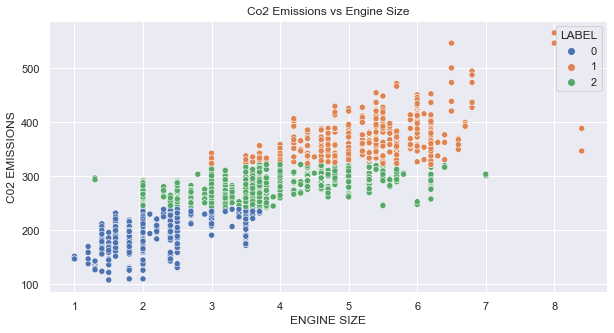

In [52]:
#Scatterplot of the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'ENGINE SIZE',y = 'C02 EMISSIONS',hue="LABEL", legend='full',data = numerical_variables, palette = "deep")
plt.xlabel('ENGINE SIZE')
plt.ylabel('C02 EMISSIONS') 
plt.title('Co2 Emissions vs Engine Size')
plt.show()